In [1]:
import collections
import glob
import json
import os
import pickle

import numpy as np
import pandas as pd
from plotnine import *

from saged import utils

In [2]:
in_files = glob.glob('../../sample_names/subset_label.tb*')
print(in_files[:5])

['../../sample_names/subset_label.tb.pytorch_supervised.refinebio_labeled_dataset.4.be_corrected.tsv', '../../sample_names/subset_label.tb.logistic_regression.refinebio_labeled_dataset.0.be_corrected.tsv', '../../sample_names/subset_label.tb.deep_net.refinebio_labeled_dataset.4.be_corrected.tsv', '../../sample_names/subset_label.tb.logistic_regression.refinebio_labeled_dataset.2.be_corrected.tsv', '../../sample_names/subset_label.tb.logistic_regression.refinebio_labeled_dataset.4.be_corrected.tsv']


In [3]:
tuberculosis_metrics = pd.DataFrame()
for path in in_files:
    new_df = pd.read_csv(path, sep='\t')
    model_info = path.strip('.tsv').split('tb.')[-1]
    model_info = model_info.split('.')
        
    supervised_model = model_info[0]
             
    new_df['supervised'] = supervised_model
    
    new_df['seed'] = model_info[-2]
        
    tuberculosis_metrics = pd.concat([tuberculosis_metrics, new_df])
    
tuberculosis_metrics = tuberculosis_metrics.rename({'fraction of healthy used': 'healthy_used'}, axis='columns')
tuberculosis_metrics['healthy_used'] = tuberculosis_metrics['healthy_used'].round(1)
tuberculosis_metrics

,accuracy,train studies,train samples,val samples,train sample count,healthy_used,supervised,seed
0,0.762963,"GSE66099,GSE65682,SRP077975,GSE83456,GSE93606,...","GSM777339,GSM777340,GSM777344,GSM777345,GSM777...","GSM1892913,GSM1892914,GSM1892915,GSM1892916,GS...",809,0.1,pytorch_supervised,4
1,0.682635,"GSE66099,GSE65682,SRP077975,GSE98583,GSE83456,...","GSM777339,GSM777340,GSM777344,GSM777345,GSM777...","GSM1892913,GSM1892914,GSM1892915,GSM1892916,GS...",959,0.2,pytorch_supervised,4
2,0.763819,"GSE66099,GSE65682,SRP077975,GSE98583,GSE83456,...","GSM777339,GSM777340,GSM777344,GSM777345,GSM777...","GSM1892913,GSM1892914,GSM1892915,GSM1892916,GS...",1109,0.3,pytorch_supervised,4
3,0.740260,"GSE66099,GSE65682,SRP077975,GSE98583,GSE83456,...","GSM777339,GSM777340,GSM777344,GSM777345,GSM777...","GSM1892913,GSM1892914,GSM1892915,GSM1892916,GS...",1259,0.4,pytorch_supervised,4
4,0.452471,"GSE66099,GSE65682,SRP077975,GSE98583,GSE83456,...","GSM777339,GSM777340,GSM777344,GSM777345,GSM777...","GSM1892913,GSM1892914,GSM1892915,GSM1892916,GS...",1409,0.5,pytorch_supervised,4
...,...,...,...,...,...,...,...,...
45,0.553991,"GSE93777,GSE65682,GSE84844,GSE45923,SRP071965,...","SRR3745139,SRR3745147,SRR3745171,SRR3745172,SR...","GSM484386,GSM484387,GSM484388,GSM484395,GSM484...",1640,0.6,deep_net,2
46,0.836134,"GSE93777,GSE65682,GSE84844,GSE45923,SRP071965,...","SRR3745139,SRR3745147,SRR3745171,SRR3745172,SR...","GSM484386,GSM484387,GSM484388,GSM484395,GSM484...",1798,0.7,deep_net,2
47,0.778626,"GSE93777,GSE65682,GSE84844,GSE45923,SRP071965,...","SRR3745139,SRR3745147,SRR3745171,SRR3745172,SR...","GSM484386,GSM484387,GSM484388,GSM484395,GSM484...",1956,0.8,deep_net,2
48,0.860140,"GSE93777,GSE65682,GSE84844,GSE45923,SRP071965,...","SRR3745139,SRR3745147,SRR3745171,SRR3745172,SR...","GSM484386,GSM484387,GSM484388,GSM484395,GSM484...",2114,0.9,deep_net,2


## TB Positive Control
Plot the same results as we got in subset labels to make sure that I didn't change anything when modifying
`subset_label_prediction` to include more info in the results

/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


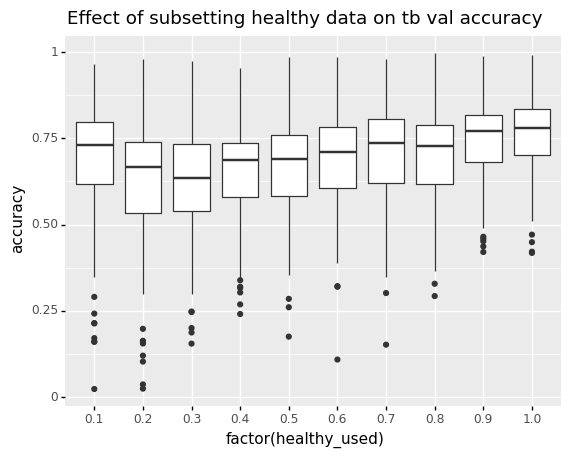

<ggplot: (8764157843709)>


In [4]:
plot = ggplot(tuberculosis_metrics, aes(x='factor(healthy_used)', y='accuracy')) 
plot += geom_boxplot()
plot += ggtitle('Effect of subsetting healthy data on tb val accuracy')
print(plot)

/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


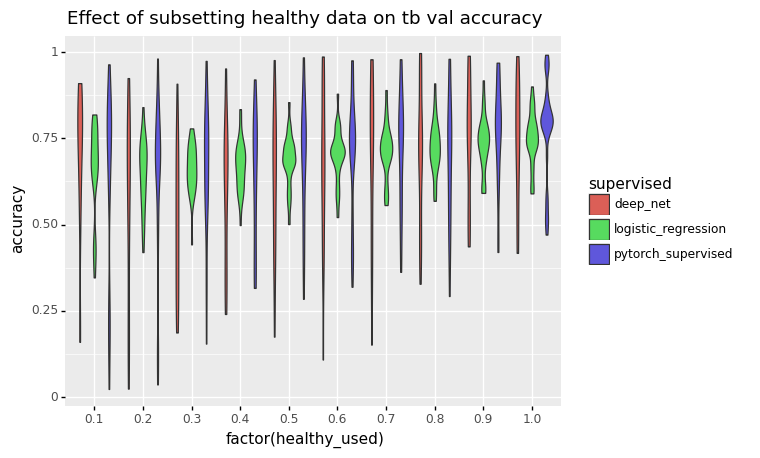

<ggplot: (8764158585182)>


In [5]:
plot = ggplot(tuberculosis_metrics, aes(x='factor(healthy_used)', y='accuracy', fill='supervised')) 
plot += geom_violin()
plot += ggtitle('Effect of subsetting healthy data on tb val accuracy')
print(plot)

In [6]:
def return_unlabeled():
    # For use in a defaultdict
    return 'unlabeled'

In [7]:
data_dir = '../../data/'
map_file = os.path.join(data_dir, 'sample_classifications.pkl')

sample_to_label = utils.parse_map_file(map_file)
sample_to_label = collections.defaultdict(return_unlabeled, sample_to_label)

In [8]:
metadata_path = os.path.join(data_dir, 'aggregated_metadata.json')
metadata = None
with open(metadata_path) as json_file:
    metadata = json.load(json_file)

In [9]:
experiments = metadata['experiments']
sample_to_study = {}
for study in experiments:
    for accession in experiments[study]['sample_accession_codes']:
        sample_to_study[accession] = study

In [10]:
def get_dataset_stats(sample_list, sample_to_study, sample_metadata, sample_to_label):
    studies = []
    platforms = []
    diseases = []
    study_disease_counts = {}

    for sample in sample_list:
        study = sample_to_study[sample]
        studies.append(study)
        platform = sample_metadata[sample]['refinebio_platform'].lower()
        platforms.append(platform)

        disease = sample_to_label[sample]
        diseases.append(disease)
        
        if study in study_disease_counts:
            study_disease_counts[study][disease] = study_disease_counts[study].get(disease, 0) + 1
        else:
            study_disease_counts[study] = {disease: 1}
            
    studies = collections.Counter(studies)
    platforms = collections.Counter(platforms)
    diseases = collections.Counter(diseases)

    
    return studies, platforms, diseases, study_disease_counts

In [11]:
def split_sample_names(df_row):
    train_samples = df_row['train samples'].split(',')
    val_samples = df_row['val samples'].split(',')
    
    return train_samples, val_samples

In [12]:
def create_dataset_stat_df(metrics_df, sample_to_study, 
                           sample_metadata, sample_to_label, disease):

    data_dict = {'train_disease_count': [],
                 'train_healthy_count': [],
                 'val_disease_count': [],
                 'val_healthy_count': [],
                 'accuracy': [],
                 'subset_fraction': [],
                 'seed': []
                }
    for _, row in tuberculosis_metrics.iterrows():
        # Keep analysis simple for now
        if row['supervised'] != 'logistic_regression':
            continue


        data_dict['seed'].append(row['seed'])    
        data_dict['subset_fraction'].append(row['healthy_used'])
        data_dict['accuracy'].append(row['accuracy'])


        train_samples, val_samples = split_sample_names(row)

        (train_studies, train_platforms, 
        train_diseases, train_disease_counts) = get_dataset_stats(train_samples,
                                                                  sample_to_study,
                                                                  sample_metadata,
                                                                  sample_to_label)
        data_dict['train_disease_count'].append(train_diseases['tb'])
        data_dict['train_healthy_count'].append(train_diseases['healthy'])


        (val_studies, val_platforms, 
        val_diseases, val_disease_counts) = get_dataset_stats(val_samples,
                                                                  sample_to_study,
                                                                  sample_metadata,
                                                                  sample_to_label)
        data_dict['val_disease_count'].append(val_diseases['tb'])
        data_dict['val_healthy_count'].append(val_diseases['healthy'])

    stat_df = pd.DataFrame.from_dict(data_dict)
    
    stat_df['train_disease_percent'] = (stat_df['train_disease_count'] / 
                                        (stat_df['train_disease_count'] + 
                                         stat_df['train_healthy_count']))
    
    stat_df['val_disease_percent'] = (stat_df['val_disease_count'] /
                                      (stat_df['val_disease_count'] + 
                                       stat_df['val_healthy_count']))
    
    stat_df['train_val_diff'] = abs(stat_df['train_disease_percent'] - 
                                    stat_df['val_disease_percent'])
    stat_df['train_count'] = (stat_df['train_disease_count'] + 
                              stat_df['train_healthy_count'])
    
    return stat_df

In [13]:
sample_metadata = metadata['samples']

In [14]:
example_train, example_val = split_sample_names(tuberculosis_metrics.iloc[0,:])
studies, platforms, diseases, study_disease_counts = get_dataset_stats(example_val, 
                                                                       sample_to_study, 
                                                                       sample_metadata, 
                                                                       sample_to_label)

In [15]:
print(study_disease_counts)

{'GSE73408': {'tb': 35}, 'GSE19491': {'tb': 68, 'healthy': 8}, 'GSE26378': {'healthy': 2}, 'GSE55201': {'healthy': 5}, 'GSE39088': {'healthy': 4}, 'SRP049820': {'healthy': 1}, 'GSE84844': {'healthy': 2}, 'GSE45291': {'healthy': 2}, 'SRP136102': {'healthy': 4}, 'GSE50635': {'healthy': 1}, 'GSE11909': {'healthy': 1}, 'GSE13015': {'healthy': 1}, 'GSE32198': {'healthy': 1}}


In [16]:
example, example_val = split_sample_names(tuberculosis_metrics.iloc[-1,:])
studies, platforms, diseases, study_disease_counts = get_dataset_stats(example_val, 
                                                                       sample_to_study, 
                                                                       sample_metadata, 
                                                                       sample_to_label)

In [17]:
print(len(studies))

13


### Raw data table
I initially thought that the v shape might be due to differences in sources of variation somehow, 
since [Alex's theoretical results](https://academic.oup.com/gigascience/article/9/11/giaa117/5952607) have a similar shape

In [18]:
tb_stat_df = create_dataset_stat_df(tuberculosis_metrics, 
                                    sample_to_study, 
                                    sample_metadata, 
                                    sample_to_label,
                                    'tb')

tb_stat_df.tail(50)

,train_disease_count,train_healthy_count,val_disease_count,val_healthy_count,accuracy,subset_fraction,seed,train_disease_percent,val_disease_percent,train_val_diff,train_count
200,619,152,143,30,0.647399,0.1,1,0.802853,0.826590,0.023736,771
201,619,304,143,60,0.729064,0.2,1,0.670639,0.704433,0.033794,923
202,619,456,143,90,0.703863,0.3,1,0.575814,0.613734,0.037920,1075
203,619,608,143,120,0.718631,0.4,1,0.504482,0.543726,0.039244,1227
204,619,760,143,150,0.726962,0.5,1,0.448876,0.488055,0.039179,1379
205,619,912,143,180,0.736842,0.6,1,0.404311,0.442724,0.038414,1531
206,619,1064,143,210,0.733711,0.7,1,0.367796,0.405099,0.037304,1683
207,619,1216,143,240,0.738903,0.8,1,0.337330,0.373368,0.036038,1835
208,619,1368,143,270,0.774818,0.9,1,0.311525,0.346247,0.034722,1987
209,619,1521,143,300,0.787810,1.0,1,0.289252,0.322799,0.033547,2140


### Effect of label distribution
Looking at the raw data, there appeared to be a correlation between accuracy and the difference between the train and val data distributions. Upon plotting the data it seems to have a clear effect

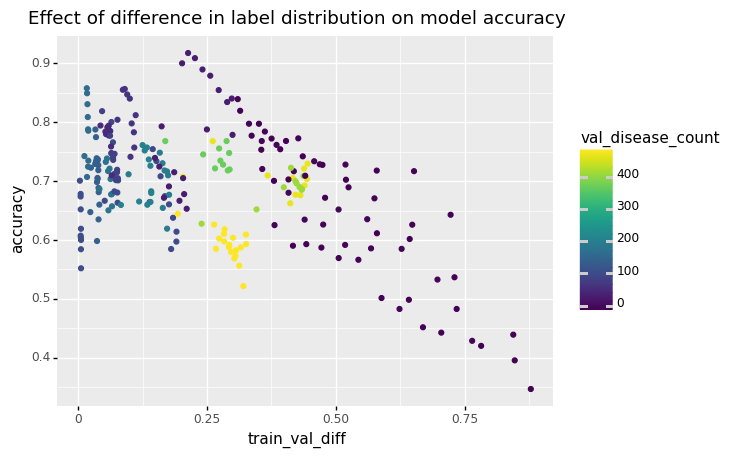

<ggplot: (8764158607330)>

In [19]:
plot = ggplot(tb_stat_df, aes(x='train_val_diff', y='accuracy', color='val_disease_count')) 
plot += geom_point()
plot += ggtitle('Effect of difference in label distribution on model accuracy')
plot

### Effect of amount of train data
Despite the negative effects of the label distribution difference, the models still seem to do better with more data

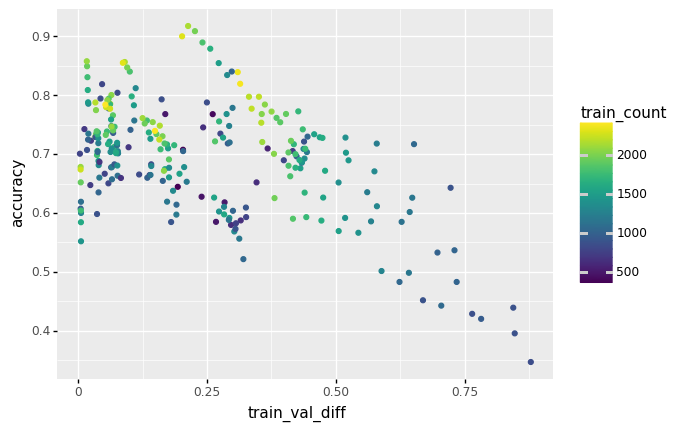

<ggplot: (8764158607201)>

In [20]:
ggplot(tb_stat_df, aes(x='train_val_diff', y='accuracy', color='train_count')) + geom_point()

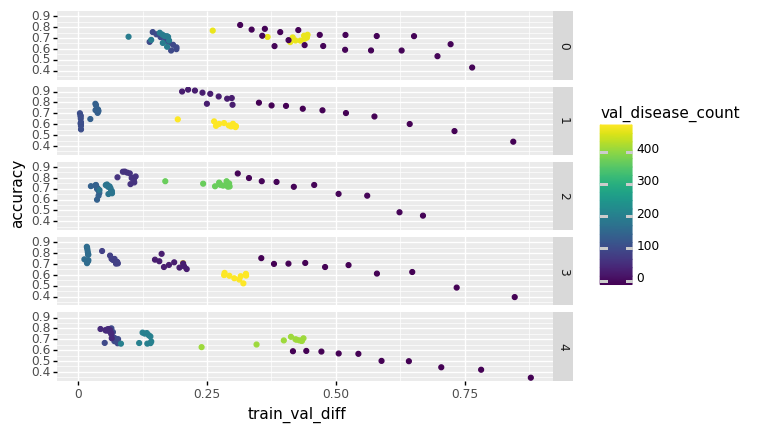

<ggplot: (8764158007013)>

In [21]:
plot = ggplot(tb_stat_df, aes(x='train_val_diff', y='accuracy', color='val_disease_count')) 
plot += geom_point()
plot += facet_grid('seed ~ .')
plot

## Sepsis Positive Control

In [22]:
in_files = glob.glob('../../sample_names/subset_label.sepsis*')
print(in_files[:5])

['../../sample_names/subset_label.sepsis.pytorch_supervised.refinebio_labeled_dataset.4.be_corrected.tsv', '../../sample_names/subset_label.sepsis.deep_net.refinebio_labeled_dataset.0.be_corrected.tsv', '../../sample_names/subset_label.sepsis.pytorch_supervised.refinebio_labeled_dataset.1.be_corrected.tsv', '../../sample_names/subset_label.sepsis.deep_net.refinebio_labeled_dataset.3.be_corrected.tsv', '../../sample_names/subset_label.sepsis.pytorch_supervised.refinebio_labeled_dataset.2.be_corrected.tsv']


In [23]:
sepsis_metrics = pd.DataFrame()
for path in in_files:
    new_df = pd.read_csv(path, sep='\t')
    model_info = path.strip('.tsv').split('sepsis.')[-1]
    model_info = model_info.split('.')
        
    supervised_model = model_info[0]
             
    new_df['supervised'] = supervised_model
    
    new_df['seed'] = model_info[-2]
        
    sepsis_metrics = pd.concat([sepsis_metrics, new_df])
    
sepsis_metrics = sepsis_metrics.rename({'fraction of healthy used': 'healthy_used'}, axis='columns')
sepsis_metrics['healthy_used'] = sepsis_metrics['healthy_used'].round(1)
sepsis_metrics.head(5)

,accuracy,train studies,train samples,val samples,train sample count,healthy_used,supervised,seed
0,0.808989,"SRP132709,GSE80060,GSE13904,GSE39088,GSE64457,...","GSM102985,GSM102986,GSM102987,GSM102988,GSM102...","GSM201245,GSM201247,GSM201248,GSM201249,GSM201...",1386,0.1,pytorch_supervised,4
1,0.926606,"SRP132709,E-MEXP-1635,GSE80060,GSE13904,GSE390...","GSM102985,GSM102986,GSM102987,GSM102988,GSM102...","GSM201245,GSM201247,GSM201248,GSM201249,GSM201...",1548,0.2,pytorch_supervised,4
2,0.800000,"SRP132709,E-MEXP-1635,GSE80060,GSE13904,GSE390...","GSM102985,GSM102986,GSM102987,GSM102988,GSM102...","GSM201245,GSM201247,GSM201248,GSM201249,GSM201...",1710,0.3,pytorch_supervised,4
3,0.766667,"SRP132709,E-MEXP-1635,GSE80060,GSE13904,GSE390...","GSM102985,GSM102986,GSM102987,GSM102988,GSM102...","GSM201245,GSM201247,GSM201248,GSM201249,GSM201...",1871,0.4,pytorch_supervised,4
4,0.789474,"SRP132709,E-MEXP-1635,GSE80060,GSE13904,GSE390...","GSM102985,GSM102986,GSM102987,GSM102988,GSM102...","GSM201245,GSM201247,GSM201248,GSM201249,GSM201...",2033,0.5,pytorch_supervised,4


/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


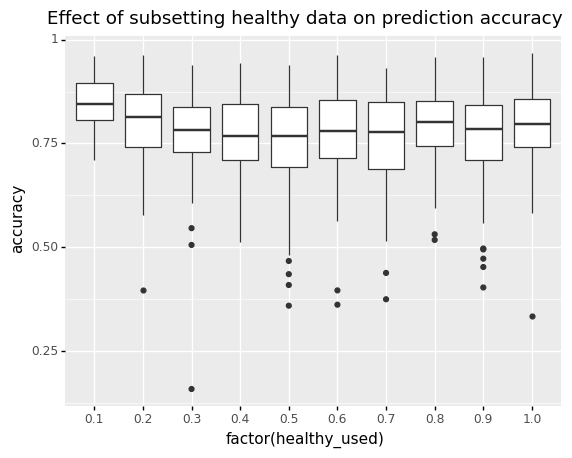

<ggplot: (8764005475371)>


In [24]:
plot = ggplot(sepsis_metrics, aes(x='factor(healthy_used)', y='accuracy')) 
plot += geom_boxplot()
plot += ggtitle('Effect of subsetting healthy data on prediction accuracy')
print(plot)

/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


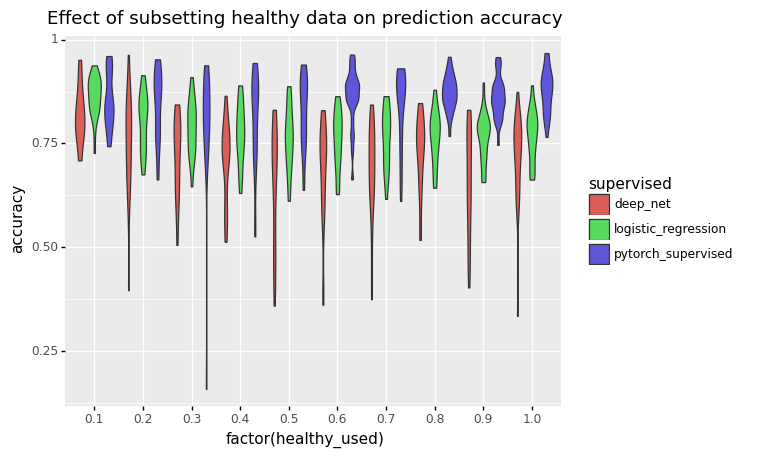

<ggplot: (8764005437718)>


In [25]:
plot = ggplot(sepsis_metrics, aes(x='factor(healthy_used)', y='accuracy', fill='supervised')) 
plot += geom_violin()
plot += ggtitle('Effect of subsetting healthy data on prediction accuracy')
print(plot)

## Visualize data characteristics

In [26]:
sepsis_stat_df = create_dataset_stat_df(sepsis_metrics, 
                                        sample_to_study, 
                                        sample_metadata, 
                                        sample_to_label,
                                        'sepsis')

sepsis_stat_df.tail(5)

,train_disease_count,train_healthy_count,val_disease_count,val_healthy_count,accuracy,subset_fraction,seed,train_disease_percent,val_disease_percent,train_val_diff,train_count
245,292,751,470,340,0.603704,0.6,1,0.279962,0.580247,0.300285,1043
246,292,877,470,397,0.588235,0.7,1,0.249786,0.542099,0.292313,1169
247,292,1002,470,454,0.610390,0.8,1,0.225657,0.508658,0.283001,1294
248,292,1127,470,511,0.602446,0.9,1,0.205779,0.479103,0.273324,1419
249,292,1253,470,568,0.626204,1.0,1,0.188997,0.452794,0.263797,1545


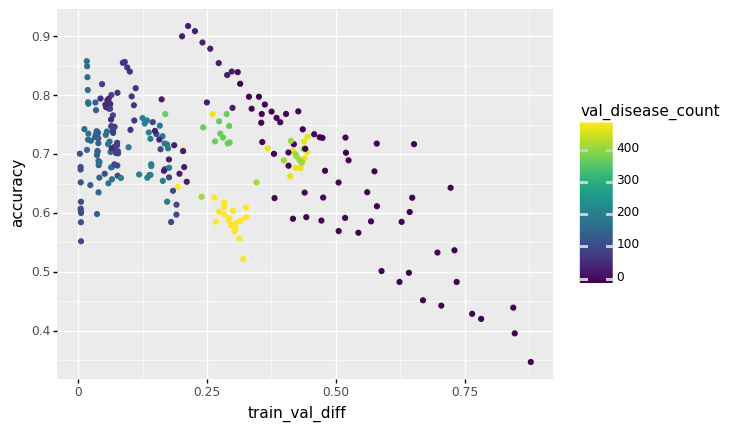

<ggplot: (8764005455496)>

In [27]:
ggplot(sepsis_stat_df, aes(x='train_val_diff', y='accuracy', color='val_disease_count')) + geom_point()

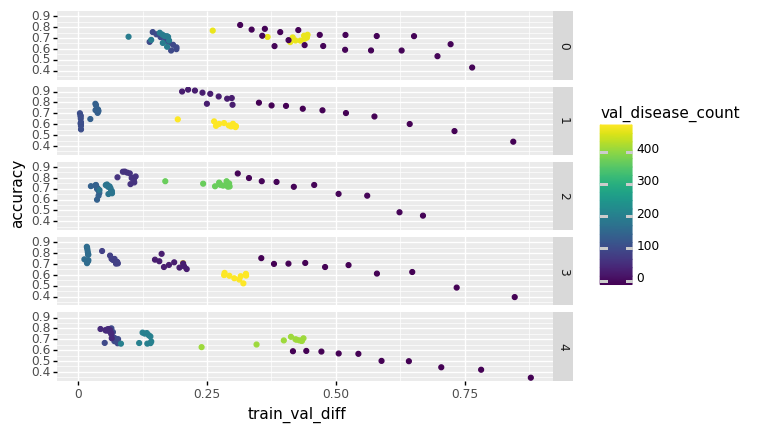

<ggplot: (8764005351982)>

In [28]:
plot = ggplot(sepsis_stat_df, aes(x='train_val_diff', y='accuracy', color='val_disease_count')) 
plot += geom_point()
plot += facet_grid('seed ~ .')
plot

# Fixing V Shape
If the v shape is caused by the competing benefits/detriments of increasing data and changing label distributions, 
then we can find the true effect of adding more data by controlling for the latter

## Properly subsampled TB data

In [29]:
in_files = glob.glob('../../sample_names/subset_all.tb*')
print(in_files[:5])

['../../sample_names/subset_all.tb.logistic_regression.refinebio_labeled_dataset.3.be_corrected.tsv', '../../sample_names/subset_all.tb.logistic_regression.refinebio_labeled_dataset.1.be_corrected.tsv', '../../sample_names/subset_all.tb.deep_net.refinebio_labeled_dataset.2.be_corrected.tsv', '../../sample_names/subset_all.tb.deep_net.refinebio_labeled_dataset.3.be_corrected.tsv', '../../sample_names/subset_all.tb.pytorch_supervised.refinebio_labeled_dataset.3.be_corrected.tsv']


In [30]:
tuberculosis_metrics = pd.DataFrame()
for path in in_files:
    new_df = pd.read_csv(path, sep='\t')
    model_info = path.strip('.tsv').split('tb.')[-1]
    model_info = model_info.split('.')
        
    supervised_model = model_info[0]
             
    new_df['supervised'] = supervised_model
    
    new_df['seed'] = model_info[-2]
        
    tuberculosis_metrics = pd.concat([tuberculosis_metrics, new_df])
    
tuberculosis_metrics = tuberculosis_metrics.rename({'fraction of healthy used': 'healthy_used'}, axis='columns')
tuberculosis_metrics['healthy_used'] = tuberculosis_metrics['healthy_used'].round(1)
tuberculosis_metrics.tail(5)

,accuracy,train studies,train samples,val samples,train sample count,healthy_used,supervised,seed
45,0.601286,"GSE13904,GSE45537,GSE33341,SRP071965,GSE64457,...","GSM3084141,GSM1331480,GSM824758,GSM1617674,GSM...","GSM989159,SRR4784472,SRR4784393,SRR4784982,GSM...",927,0.6,deep_net,1
46,0.681818,"GSE13904,GSE45537,GSE33341,SRP071965,GSE64457,...","GSM3084141,GSM1331480,GSM824758,GSM1617674,GSM...","GSM989159,SRR4784472,SRR4784393,SRR4784982,GSM...",1081,0.7,deep_net,1
47,0.663855,"GSE13904,GSE45537,GSE33341,SRP071965,GSE64457,...","GSM3084141,GSM1331480,GSM824758,GSM1617674,GSM...","GSM989159,SRR4784472,SRR4784393,SRR4784982,GSM...",1236,0.8,deep_net,1
48,0.670236,"GSE13904,GSE45537,GSE33341,SRP071965,GSE64457,...","GSM3084141,GSM1331480,GSM824758,GSM1617674,GSM...","GSM989159,SRR4784472,SRR4784393,SRR4784982,GSM...",1390,0.9,deep_net,1
49,0.587669,"GSE13904,GSE45537,GSE33341,SRP071965,GSE64457,...","GSM3084141,GSM1331480,GSM824758,GSM1617674,GSM...","GSM989159,SRR4784472,SRR4784393,SRR4784982,GSM...",1545,1.0,deep_net,1


/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


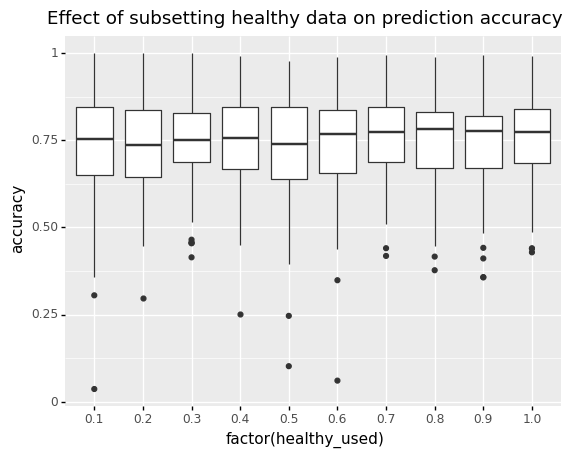

<ggplot: (8764005202204)>


In [31]:
plot = ggplot(tuberculosis_metrics, aes(x='factor(healthy_used)', y='accuracy')) 
plot += geom_boxplot()
plot += ggtitle('Effect of subsetting healthy data on prediction accuracy')
print(plot)

/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


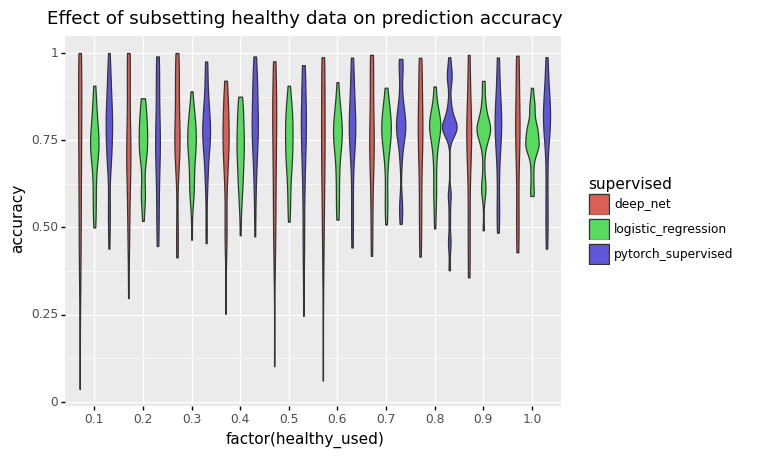

<ggplot: (8764005145938)>


In [32]:
plot = ggplot(tuberculosis_metrics, aes(x='factor(healthy_used)', y='accuracy', fill='supervised')) 
plot += geom_violin()
plot += ggtitle('Effect of subsetting healthy data on prediction accuracy')
print(plot)

In [33]:
tb_stat_df = create_dataset_stat_df(tuberculosis_metrics, 
                                    sample_to_study, 
                                    sample_metadata, 
                                    sample_to_label,
                                    'tb')

tb_stat_df.tail(5)

,train_disease_count,train_healthy_count,val_disease_count,val_healthy_count,accuracy,subset_fraction,seed,train_disease_percent,val_disease_percent,train_val_diff,train_count
245,337,906,122,184,0.794118,0.6,4,0.271118,0.398693,0.127575,1243
246,399,1051,142,215,0.806723,0.7,4,0.275172,0.397759,0.122587,1450
247,449,1208,162,246,0.801471,0.8,4,0.270972,0.397059,0.126087,1657
248,499,1365,184,275,0.790850,0.9,4,0.267704,0.400871,0.133168,1864
249,560,1512,202,309,0.767123,1.0,4,0.270270,0.395303,0.125033,2072


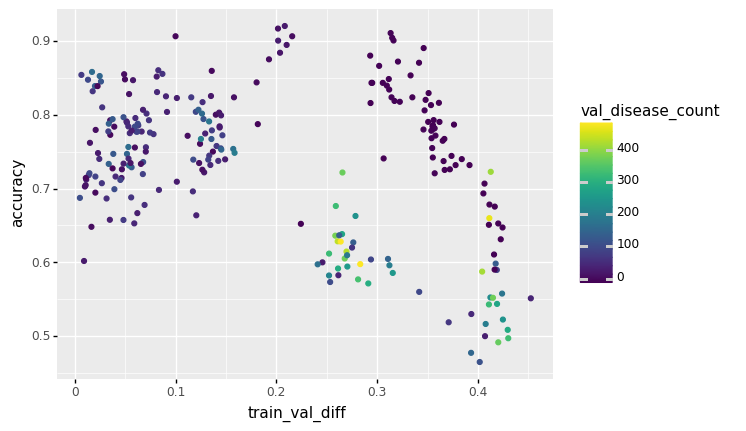

<ggplot: (8764005184323)>

In [34]:
ggplot(tb_stat_df, aes(x='train_val_diff', y='accuracy', color='val_disease_count')) + geom_point()

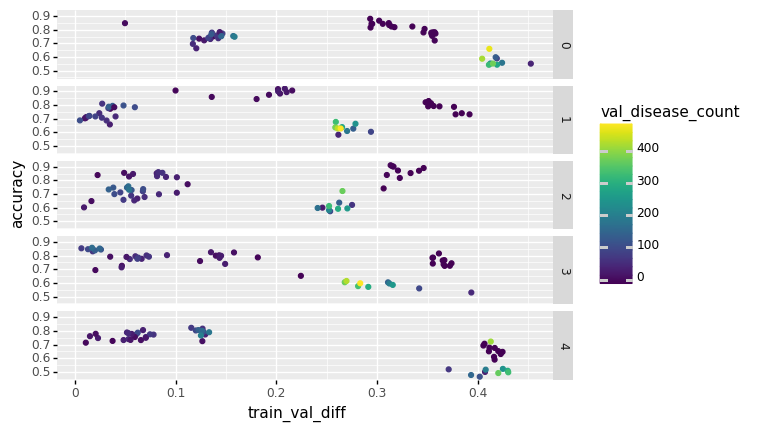

<ggplot: (8764005063078)>

In [35]:
plot = ggplot(tb_stat_df, aes(x='train_val_diff', y='accuracy', color='val_disease_count')) 
plot += geom_point()
plot += facet_grid('seed ~ .')
plot

In [36]:
tb_stat_df['train_count'] = tb_stat_df['train_disease_count'] + tb_stat_df['train_healthy_count']

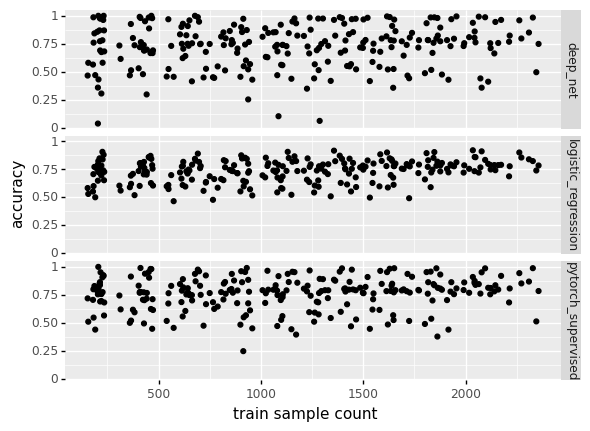

<ggplot: (8764004870148)>

In [37]:
plot = ggplot(tuberculosis_metrics, aes(x='train sample count', y='accuracy')) 
plot += geom_point()
plot += facet_grid('supervised ~ .')
plot

## Sepsis Analysis

In [38]:
in_files = glob.glob('../../sample_names/subset_all.sepsis*')
print(in_files[:5])

['../../sample_names/subset_all.sepsis.pytorch_supervised.refinebio_labeled_dataset.4.be_corrected.tsv', '../../sample_names/subset_all.sepsis.deep_net.refinebio_labeled_dataset.2.be_corrected.tsv', '../../sample_names/subset_all.sepsis.pytorch_supervised.refinebio_labeled_dataset.2.be_corrected.tsv', '../../sample_names/subset_all.sepsis.deep_net.refinebio_labeled_dataset.1.be_corrected.tsv', '../../sample_names/subset_all.sepsis.pytorch_supervised.refinebio_labeled_dataset.1.be_corrected.tsv']


In [39]:
sepsis_metrics = pd.DataFrame()
for path in in_files:
    new_df = pd.read_csv(path, sep='\t')
    model_info = path.strip('.tsv').split('sepsis.')[-1]
    model_info = model_info.split('.')
        
    supervised_model = model_info[0]
             
    new_df['supervised'] = supervised_model
    
    new_df['seed'] = model_info[-2]
        
    sepsis_metrics = pd.concat([sepsis_metrics, new_df])
    
sepsis_metrics = sepsis_metrics.rename({'fraction of healthy used': 'healthy_used'}, axis='columns')
sepsis_metrics['healthy_used'] = sepsis_metrics['healthy_used'].round(1)
sepsis_metrics

,accuracy,train studies,train samples,val samples,train sample count,healthy_used,supervised,seed
0,0.925926,"GSE3284,GSE98793,SRP077975,GSE66890,GSE10474,G...","GSM2631181,GSM1617725,GSM2630929,GSM2612278,GS...","GSM2203600,GSM912844,GSM938859,GSM201295,GSM22...",284,0.1,pytorch_supervised,4
1,0.962963,"GSE3284,GSE98793,GSE3491,SRP077975,GSE66890,GS...","GSM2631181,GSM1617725,GSM2630929,GSM2612278,GS...","GSM2203600,GSM912844,GSM938859,GSM201295,GSM22...",568,0.2,pytorch_supervised,4
2,0.975309,"GSE3284,GSE98793,GSE3491,SRP077975,GSE66890,GS...","GSM2631181,GSM1617725,GSM2630929,GSM2612278,GS...","GSM2203600,GSM912844,GSM938859,GSM201295,GSM22...",852,0.3,pytorch_supervised,4
3,0.798165,"GSE3284,GSE98793,GSE3491,SRP077975,GSE66890,GS...","GSM2631181,GSM1617725,GSM2630929,GSM2612278,GS...","GSM2203600,GSM912844,GSM938859,GSM201295,GSM22...",1136,0.4,pytorch_supervised,4
4,0.897059,"GSE3284,GSE98793,GSE3491,SRP077975,GSE66890,GS...","GSM2631181,GSM1617725,GSM2630929,GSM2612278,GS...","GSM2203600,GSM912844,GSM938859,GSM201295,GSM22...",1421,0.5,pytorch_supervised,4
...,...,...,...,...,...,...,...,...
45,0.685714,"GSE57065,GSE3491,GSE4607,GSE11755,SRP092402,GS...","GSM2631165,GSM297790,SRR1652914,SRR3236079,GSM...","GSM350145,GSM1586980,GSM350240,GSM1586934,GSM9...",1588,0.6,deep_net,3
46,0.614679,"GSE57065,GSE3491,GSE4607,GSE11755,SRP092402,GS...","GSM2631165,GSM297790,SRR1652914,SRR3236079,GSM...","GSM350145,GSM1586980,GSM350240,GSM1586934,GSM9...",1852,0.7,deep_net,3
47,0.617647,"GSE57065,GSE3491,GSE4607,GSE11755,SRP092402,GS...","GSM2631165,GSM297790,SRR1652914,SRR3236079,GSM...","GSM350145,GSM1586980,GSM350240,GSM1586934,GSM9...",2117,0.8,deep_net,3
48,0.712589,"GSE57065,GSE3491,GSE4607,GSE11755,SRP092402,GS...","GSM2631165,GSM297790,SRR1652914,SRR3236079,GSM...","GSM350145,GSM1586980,GSM350240,GSM1586934,GSM9...",2382,0.9,deep_net,3


/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


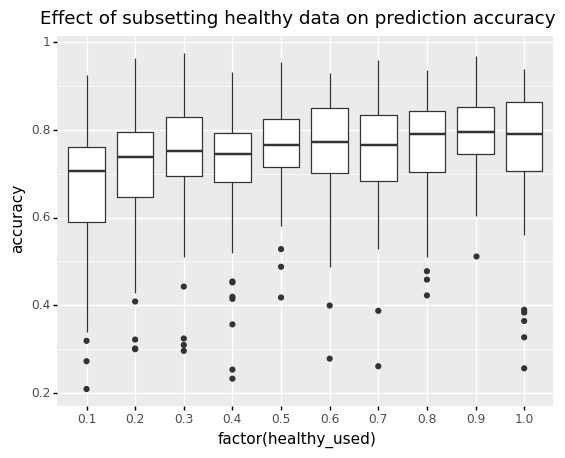

<ggplot: (8764004779855)>


In [40]:
plot = ggplot(sepsis_metrics, aes(x='factor(healthy_used)', y='accuracy')) 
plot += geom_boxplot()
plot += ggtitle('Effect of subsetting healthy data on prediction accuracy')
print(plot)

/home/ben/anaconda3/envs/saged/lib/python3.8/site-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


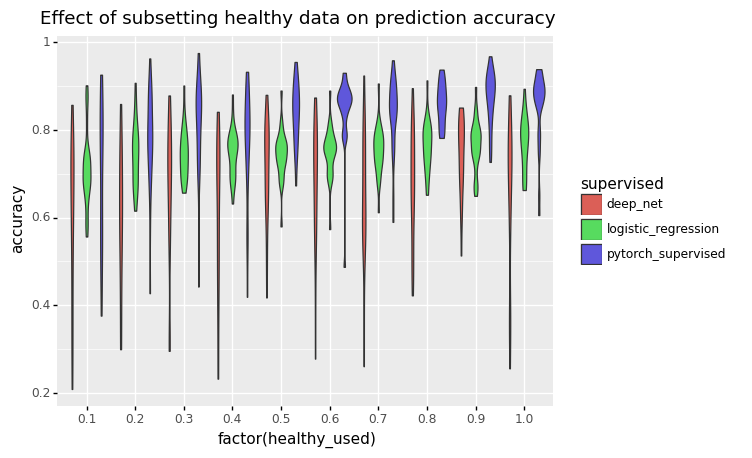

<ggplot: (8764004791601)>


In [41]:
plot = ggplot(sepsis_metrics, aes(x='factor(healthy_used)', y='accuracy', fill='supervised')) 
plot += geom_violin()
plot += ggtitle('Effect of subsetting healthy data on prediction accuracy')
print(plot)

## Visualize data characteristics

In [42]:
sepsis_stat_df = create_dataset_stat_df(sepsis_metrics, 
                                        sample_to_study, 
                                        sample_metadata, 
                                        sample_to_label,
                                        'sepsis')

sepsis_stat_df.tail(5)

,train_disease_count,train_healthy_count,val_disease_count,val_healthy_count,accuracy,subset_fraction,seed,train_disease_percent,val_disease_percent,train_val_diff,train_count
245,337,906,122,184,0.794118,0.6,4,0.271118,0.398693,0.127575,1243
246,399,1051,142,215,0.806723,0.7,4,0.275172,0.397759,0.122587,1450
247,449,1208,162,246,0.801471,0.8,4,0.270972,0.397059,0.126087,1657
248,499,1365,184,275,0.790850,0.9,4,0.267704,0.400871,0.133168,1864
249,560,1512,202,309,0.767123,1.0,4,0.270270,0.395303,0.125033,2072


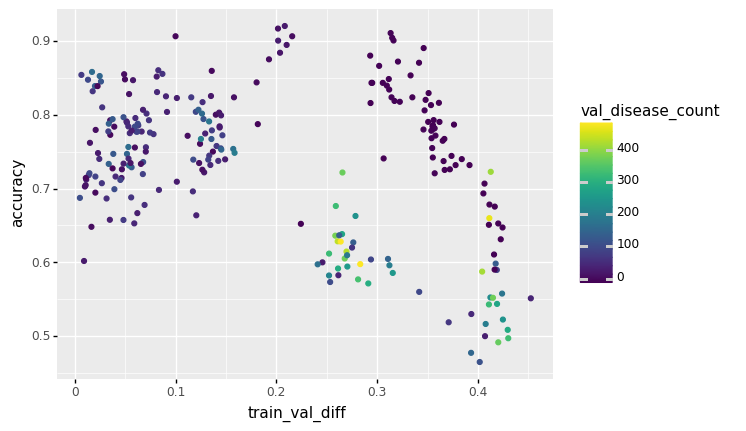

<ggplot: (8764004702820)>

In [43]:
ggplot(sepsis_stat_df, aes(x='train_val_diff', 
                           y='accuracy', 
                           color='val_disease_count')) + geom_point()

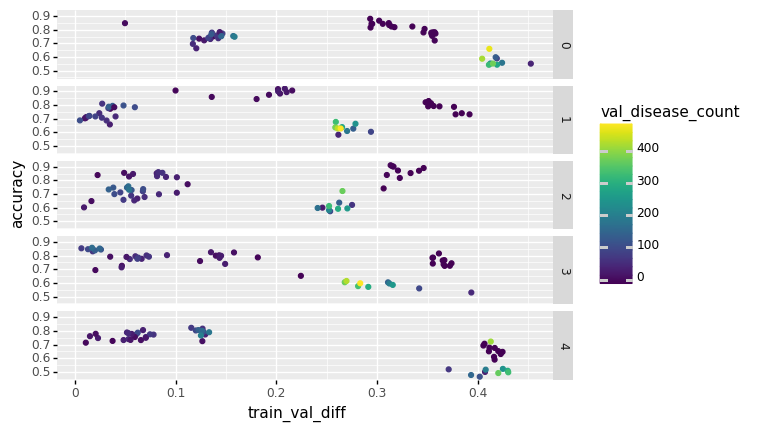

<ggplot: (8764004762161)>

In [44]:
plot = ggplot(sepsis_stat_df, aes(x='train_val_diff', 
                                  y='accuracy', 
                                  color='val_disease_count')) 
plot += geom_point()
plot += facet_grid('seed ~ .')
plot

In [45]:
sepsis_stat_df['train_count'] = (sepsis_stat_df['train_disease_count'] +
                                 sepsis_stat_df['train_healthy_count'])

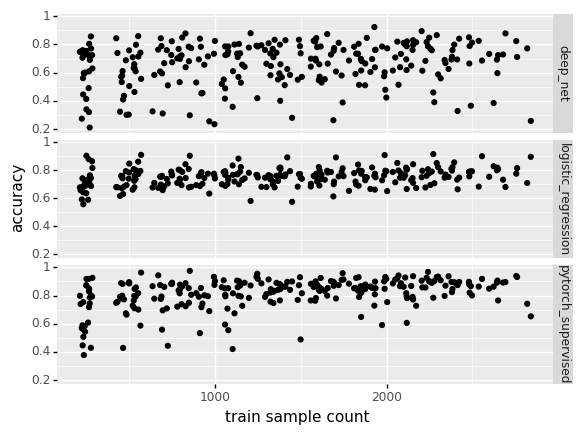

<ggplot: (8764004507642)>

In [46]:
plot = ggplot(sepsis_metrics, aes(x='train sample count', y='accuracy')) 
plot += geom_point()
plot += facet_grid('supervised ~ .')
plot